In [2]:
import pandas as pd
import numpy as np
import plotly.express as px


all_data = pd.read_csv("spotify-2023.csv", encoding='latin-1')
all_data['streams'] = pd.to_numeric(all_data['streams'], errors='coerce')


In [3]:
most_streamed_song_by_year = all_data.loc[all_data.groupby('released_year')['streams'].idxmax()]

clean_data = most_streamed_song_by_year[['track_name', 'artist(s)_name', 'released_year', 'streams']]

fig = px.bar(clean_data, x='released_year',
             y='streams', hover_data=['artist(s)_name', 'track_name'],
             title='Most Streamed Songs by Year')

fig.show()

In [4]:
top_songs_by_year = all_data.groupby('released_year').apply(lambda group: group.nlargest(3, 'streams')).reset_index(drop=True)
top_songs_by_year = top_songs_by_year[['track_name', 'artist(s)_name', 'released_year', 'streams']]
top_songs_by_year = top_songs_by_year.query("""released_year >= 2010""")

custom_colors = ['#FF0000', '#33FF57', '#0000DD']


fig = px.bar(top_songs_by_year, x='released_year', color=top_songs_by_year.groupby('released_year').cumcount(),
             y='streams', hover_data=['artist(s)_name', 'track_name'], text='track_name',
             height=800, color_continuous_scale='Jet',
             title='Top 3 Streamed Songs by Year', barmode='group',)

# Customize the layout for better visualization
fig.update_traces(texttemplate='%{text}', textposition='inside')

fig.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_308\4222178009.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



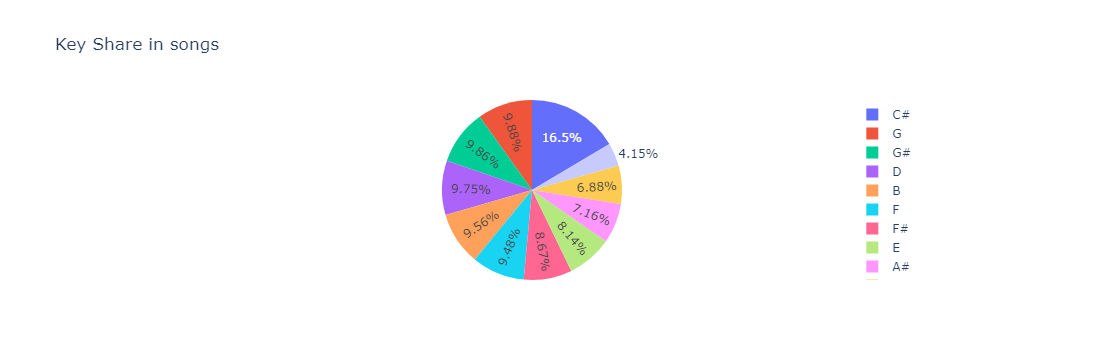

In [136]:
song_keys = all_data[['released_year', 'key', 'streams']]
song_keys['count'] = song_keys.apply(lambda x: 1, axis=1)

def format_to_millions(number):
    return number / 1e9
group = song_keys.groupby('key')['streams'].sum().reset_index()

# Apply the custom formatting function to the 'value' column
group['value_in_millions'] = group['streams'].apply(format_to_millions)
fig = px.pie(group, values='value_in_millions', names='key', title='Key Share in songs')

fig.update_traces(hovertemplate='%{label}: %{value:.2s} Billion', textinfo='percent')

fig.show()

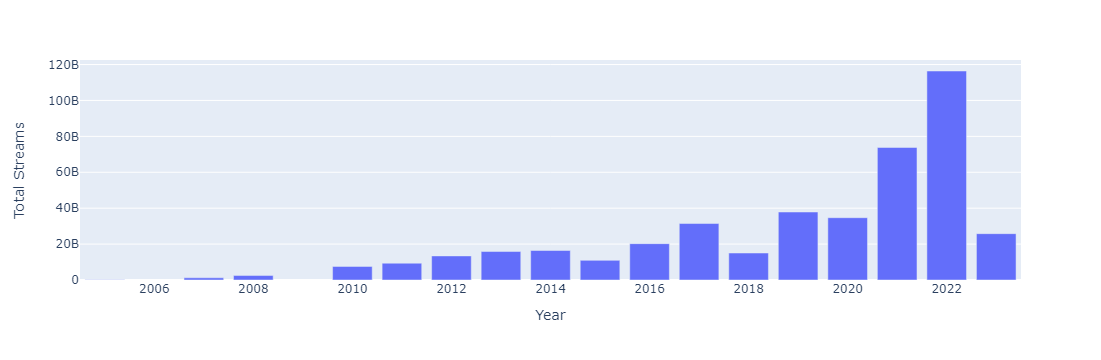

In [141]:
data = all_data[['released_year','streams']]
data = data.query("released_year >= 2005")

data = data.groupby('released_year')['streams'].sum().reset_index()

fig = px.bar(data,x='released_year',
             y='streams', labels={'released_year': "Year", 'streams': "Total Streams"})

fig.show()

